In [1]:
get_ipython().system('pip install opencv-python')
import numpy as np
import pickle
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt


[notice] A new release of pip is available: 23.0 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
IMAGE_SIZE=256
BATCH_SIZE=32
import tensorflow as tf
images_dataset= tf.keras.utils.image_dataset_from_directory(
 'plantvillage dataset',
 shuffle=True,
 image_size=(IMAGE_SIZE,IMAGE_SIZE),
 batch_size=BATCH_SIZE,
 
)

Found 162916 files belonging to 3 classes.


In [4]:
class_names=images_dataset.class_names
class_names

['color', 'grayscale', 'segmented']

In [5]:
len(images_dataset)

5092

In [7]:
get_ipython().system('pip install keras')
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
IMAGE_SIZE=256
BATCH_SIZE=32
images_dataset= tf.keras.utils.image_dataset_from_directory(
 'plantvillage dataset',
 shuffle=True,
 image_size=(IMAGE_SIZE,IMAGE_SIZE),
 batch_size=BATCH_SIZE,
 
)
for image_batch, label_batch in images_dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())



[notice] A new release of pip is available: 23.0 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Found 162916 files belonging to 3 classes.
(32, 256, 256, 3)
[2 2 1 1 0 0 1 2 0 2 0 2 1 0 0 1 2 1 1 2 0 0 0 1 2 1 2 2 2 2 0 0]


In [8]:
#printing first image of data set
for image_batch, label_batch in images_dataset.take(1):
    print(image_batch[0].numpy())

[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]



[notice] A new release of pip is available: 23.0 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Found 162916 files belonging to 3 classes.
4073 509 510


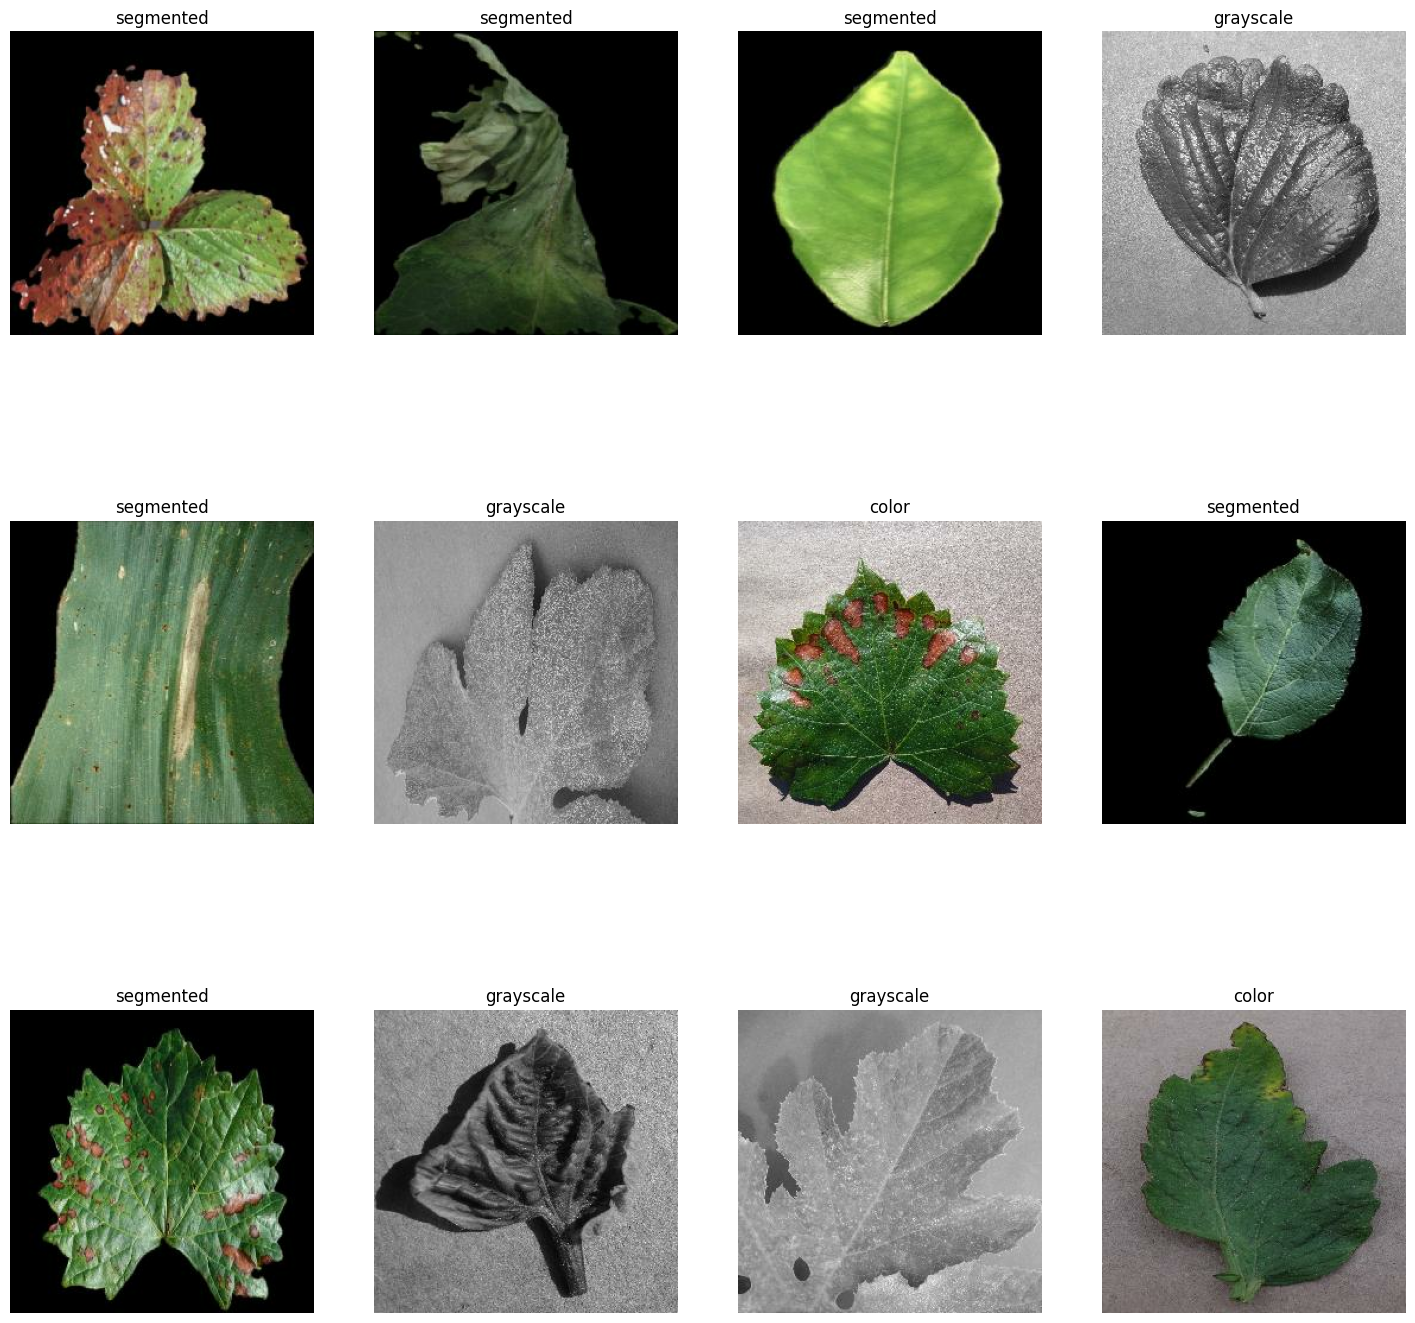

In [12]:
#visualize the first image in that batch
get_ipython().system('pip install keras')
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
IMAGE_SIZE=256
BATCH_SIZE=32
images_dataset= tf.keras.utils.image_dataset_from_directory(
 'plantvillage dataset',
 shuffle=True,
 image_size=(IMAGE_SIZE,IMAGE_SIZE),
 batch_size=BATCH_SIZE,
 
)
class_names=images_dataset.class_names
class_names
plt.figure(figsize=(18,18))
for image_batch, label_batch in images_dataset.take(1):
    for i in range (12):
        ax=plt.subplot(3,4, i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])
        plt.axis('off')
        
        
    def get_dataset_partitions_tf(ds,train_split=0.8, val_split=0.1, test_split=0.1,shuffle=True, shuffle_size=10000):
        ds_size=len(ds)
        if shuffle:
            ds=ds.shuffle(shuffle_size,seed=12)
            
            train_size= int(train_split* ds_size)
            
            val_size=int(val_split* ds_size)
            
            train_ds=ds.take(train_size)
            
            val_ds=ds.skip(train_size).take(val_size)
            
            test_ds=ds.skip(train_size).skip(val_size)
            
            return train_ds, val_ds, test_ds
        
train_ds, val_ds, test_ds=get_dataset_partitions_tf(images_dataset)
print(len(train_ds),len(val_ds),len(test_ds))
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)


[notice] A new release of pip is available: 23.0 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


1/1 [==============================] - 4s 4s/step


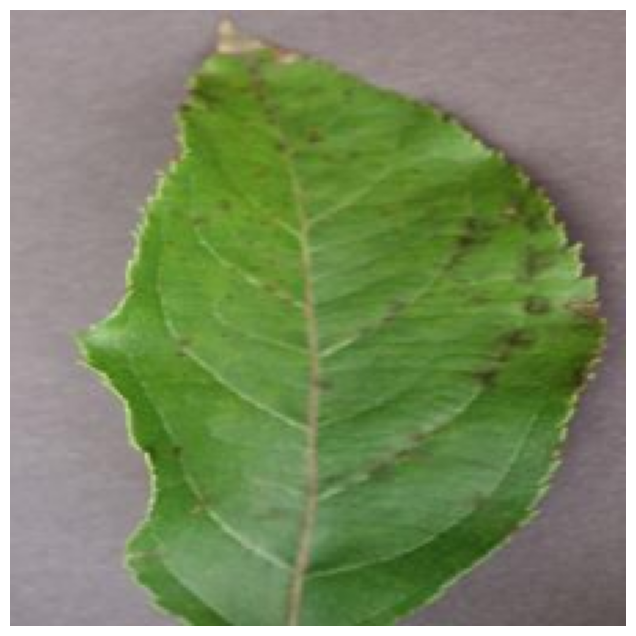

Top 1: Class=head_cabbage, Probability=9.0851
Top 2: Class=pot, Probability=4.2538
Top 3: Class=quill, Probability=4.2186
Top 4: Class=cauliflower, Probability=4.0921
Top 5: Class=vase, Probability=3.4650


In [43]:
get_ipython().system('pip install tensorflow-hub')
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Define the path to the pre-trained model
model_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"

# Load the pre-trained model from TensorFlow Hub
model = tf.keras.Sequential([hub.KerasLayer(model_url)])

# Define the input image size expected by the model
input_image_size = (224, 224)

# Define a function to preprocess an image
def preprocess_image(image_path):
    image = Image.open(image_path)
    image = image.resize(input_image_size)
    image = np.array(image) / 255.0  # Normalize pixel values to [0, 1]
    image = image[np.newaxis, ...]  # Add batch dimension
    return image

# Define the path to your test image
image_path = r"D:\Sync Project\PlantDisease\plantvillage dataset\color\Apple___Apple_scab\0a5e9323-dbad-432d-ac58-d291718345d9___FREC_Scab 3417.JPG"
# Preprocess the test image
test_image = preprocess_image(image_path)

# Make predictions
predictions = model.predict(test_image)

# Apply the softmax function to normalize the predictions
normalized_predictions = tf.nn.softmax(predictions, axis=-1)

top_predictions = predictions[:, 1:1001]
# Decode the predictions to get class labels and probabilities
decoded_predictions = tf.keras.applications.mobilenet_v2.decode_predictions(top_predictions, top=5)[0]

# Display the test image and top predicted classes with probabilities
plt.figure(figsize=(8, 8))
plt.imshow(test_image[0])
plt.axis("off")
plt.show()

# Print the top predicted classes and their probabilities
for i, (class_id, class_name, probability) in enumerate(decoded_predictions):
    print(f"Top {i + 1}: Class={class_name}, Probability={probability:.4f}")



1/1 [==============================] - 4s 4s/step


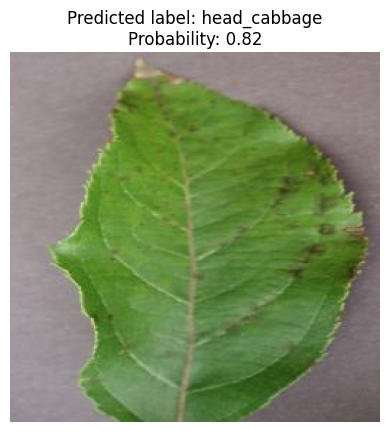

In [42]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
import matplotlib.pyplot as plt

# Load the MobileNetV2 pre-trained model (weights pre-trained on ImageNet)
model = MobileNetV2(weights='imagenet')

# Load and preprocess the test image
test_image_path = r"D:\Sync Project\PlantDisease\plantvillage dataset\color\Apple___Apple_scab\0a5e9323-dbad-432d-ac58-d291718345d9___FREC_Scab 3417.JPG"
img = cv2.imread(test_image_path)
img = cv2.resize(img, (224, 224))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # MobileNetV2 expects RGB images
img = preprocess_input(img)  # Preprocess the image

# Make predictions on the preprocessed image
predictions = model.predict(np.expand_dims(img, axis=0))
decoded_predictions = decode_predictions(predictions)

# Get the top predicted label and its probability
top_label = decoded_predictions[0][0][1]
top_probability = decoded_predictions[0][0][2]

# Display the test image along with the predicted label and probability
plt.imshow(cv2.cvtColor(cv2.imread(test_image_path), cv2.COLOR_BGR2RGB))
plt.title(f"Predicted label: {top_label}\nProbability: {top_probability:.2f}")
plt.axis('off')
plt.show()
